In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
XOM_df = pd.read_csv("XOM.CSV")

In [4]:
XOM_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-14,82.419998,82.750000,82.089996,82.239998,63.742908,9251700
1,2017-11-15,81.750000,82.089996,81.150002,81.209999,62.944584,9663600
2,2017-11-16,80.440002,80.849998,80.150002,80.559998,62.440777,10527200
3,2017-11-17,80.320000,80.660004,80.160004,80.239998,62.192745,9536400
4,2017-11-20,80.230003,80.639999,80.010002,80.550003,62.433022,8468600


In [5]:
XOM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
XOM_df['Date'] = pd.to_datetime(XOM_df['Date'])

In [7]:
XOM_df.set_index('Date', inplace=True)

In [9]:
print(XOM_df.head(3))

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-11-14  82.419998  82.750000  82.089996  82.239998  63.742908   9251700
2017-11-15  81.750000  82.089996  81.150002  81.209999  62.944584   9663600
2017-11-16  80.440002  80.849998  80.150002  80.559998  62.440777  10527200


In [12]:
XOM_df.index = pd.to_datetime(XOM_df.index)

In [13]:
mondays = pd.date_range(start=XOM_df.index.min(), end=XOM_df.index.max(), freq='W-MON')

In [14]:
XOM_Mondays = XOM_df.reindex(mondays)

In [16]:
print(XOM_Mondays.head())

                 Open       High        Low      Close  Adj Close      Volume
2017-11-20  80.230003  80.639999  80.010002  80.550003  62.433022   8468600.0
2017-11-27  81.320000  81.400002  81.019997  81.110001  62.867069   9127500.0
2017-12-04  83.209999  84.180000  83.000000  83.570000  64.773773  12597700.0
2017-12-11  83.040001  83.250000  82.739998  83.029999  64.355225   8760700.0
2017-12-18  83.180000  83.669998  82.910004  82.940002  64.285477   9363500.0


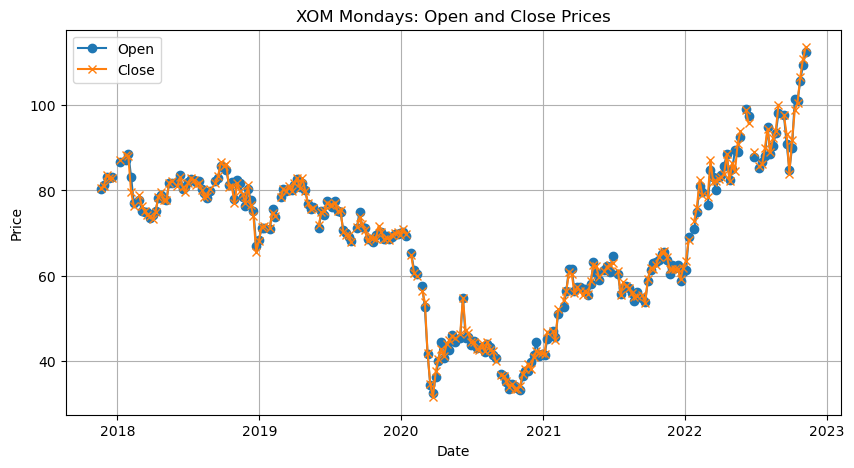

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(XOM_Mondays.index, XOM_Mondays['Open'], label='Open', marker='o')
plt.plot(XOM_Mondays.index, XOM_Mondays['Close'], label='Close', marker='x')
plt.title('XOM Mondays: Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [20]:
XOM_Month = XOM_df.resample('M').mean()

In [21]:
print(XOM_Month.head())

                 Open       High        Low      Close  Adj Close  \
Date                                                                
2017-11-30  81.273335  81.705000  81.057501  81.377499  63.074405   
2017-12-31  83.225000  83.615999  82.892000  83.193001  64.481570   
2018-01-31  87.180476  87.796667  86.712857  87.325238  67.684404   
2018-02-28  78.254737  79.123159  76.973683  77.815789  60.728350   
2018-03-31  74.599524  75.222381  73.934762  74.463809  58.305900   

                  Volume  
Date                      
2017-11-30  9.609883e+06  
2017-12-31  1.103006e+07  
2018-01-31  1.114022e+07  
2018-02-28  1.944288e+07  
2018-03-31  1.698768e+07  


In [22]:
XOM_rolling = XOM_df['Close'].rolling(window=30, min_periods=1).mean()

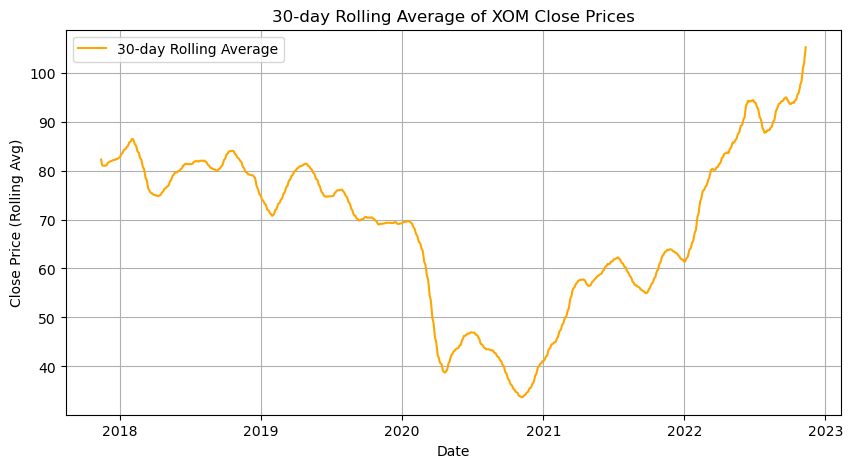

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(XOM_df.index, XOM_rolling, label='30-day Rolling Average', color='orange')
plt.title('30-day Rolling Average of XOM Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (Rolling Avg)')
plt.legend()
plt.grid()
plt.show()

In [24]:
pip install boto3

  Obtaining dependency information for boto3 from https://files.pythonhosted.org/packages/ce/4c/f705301ad8463375c137eefc9cbddd23ee1a6681e9db0fc3cb8ae7ba8426/boto3-1.35.68-py3-none-any.whl.metadata
  Obtaining dependency information for botocore<1.36.0,>=1.35.68 from https://files.pythonhosted.org/packages/c7/20/9c8b7112a7f76d819e09ad2964d0e4211bcde23e41feb0e1e92dd8b89051/botocore-1.35.68-py3-none-any.whl.metadata
  Obtaining dependency information for s3transfer<0.11.0,>=0.10.0 from https://files.pythonhosted.org/packages/66/05/7957af15543b8c9799209506df4660cba7afc4cf94bfb60513827e96bed6/s3transfer-0.10.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 12.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.76
    Uninstalling botoc

In [25]:
import boto3
import json

In [26]:
region = 'us-east-2'

In [28]:
dynamodb = boto3.resource('dynamodb', region_name=region)

In [29]:
s3 = boto3.client('s3', region_name=region)